In [ ]:
!pip install tensorflow numpy pandas scikit-learn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of transactions
num_samples = 5000  # 5000 fake transactions

# Generate random transaction amounts ($10 - $5000)
transaction_amounts = np.random.uniform(10, 5000, num_samples)

# Generate random transaction types (Online, In-store, Subscription, Crypto)
transaction_types = np.random.choice(['Online', 'In-store', 'Subscription', 'Crypto'], num_samples)

# Generate random device IDs (random device numbers between 1000 and 5000)
device_ids = np.random.randint(1000, 5000, num_samples)

# Generate fraud labels (5% fraud, 95% genuine)
fraud_labels = np.random.choice([0, 1], num_samples, p=[0.95, 0.05])

# Create a Pandas DataFrame
df = pd.DataFrame({
    'Transaction_Amount': transaction_amounts,
    'Transaction_Type': transaction_types,
    'Device_ID': device_ids,
    'Is_Fraud': fraud_labels
})

# Show first 5 transactions
print(df.head())


   Transaction_Amount Transaction_Type  Device_ID  Is_Fraud
0         1878.955193     Subscription       1131         0
1         4754.064389           Crypto       1929         0
2         3662.649770     Subscription       4012         0
3         2997.305836           Crypto       1928         0
4          788.533016           Crypto       3168         0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Transaction_Amount_Scaled'] = scaler.fit_transform(df[['Transaction_Amount']])


In [ ]:
df['Transaction_Type_Label'] = df['Transaction_Type'].astype('category').cat.codes


In [ ]:
time_steps = 5  # Looking at the last 5 transactions

def create_sequences(data, labels, time_steps):
    sequences = []
    seq_labels = []
    for i in range(len(data) - time_steps):
        seq = data[i:i+time_steps].values  # Select transaction features
        label = labels.iloc[i + time_steps]  # Select fraud label from original dataset
        sequences.append(seq)
        seq_labels.append(label)
    return np.array(sequences), np.array(seq_labels)

# Selecting relevant features
features = ['Transaction_Amount_Scaled', 'Transaction_Type_Label', 'Device_ID']

# Create sequences
sequences, labels = create_sequences(df[features], df['Is_Fraud'], time_steps)

# Split into Training & Testing (80% Train, 20% Test)
X_train, y_train = sequences[:4000], labels[:4000]
X_test, y_test = sequences[4000:], labels[4000:]

print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")


Training samples: (4000, 5, 3), Test samples: (995, 5, 3)


In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, len(features))),
    Dropout(0.2),  # Prevents overfitting
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8348 - loss: 0.4056 - val_accuracy: 0.9477 - val_loss: 0.2051
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9514 - loss: 0.1974 - val_accuracy: 0.9477 - val_loss: 0.2054
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9433 - loss: 0.2206 - val_accuracy: 0.9477 - val_loss: 0.2053
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9468 - loss: 0.2094 - val_accuracy: 0.9477 - val_loss: 0.2053
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9410 - loss: 0.2284 - val_accuracy: 0.9477 - val_loss: 0.2117
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9432 - loss: 0.2225 - val_accuracy: 0.9477 - val_loss: 0.2063
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9504 - loss: 0.2000 - val_accuracy: 0.9477 - val_loss: 0.2051
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9426 - loss: 0.2220 - val_acc

In [ ]:
# Evaluate Model on Test Data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9338 - loss: 0.2559
Test Accuracy: 94.77%


In [ ]:
# Generate a new test dataset
num_samples_test = 1000

# Generate random transaction amounts ($10 - $5000)
transaction_amounts_test = np.random.uniform(10, 5000, num_samples_test)

# Generate new transaction types (Online, In-store, Subscription, Crypto)
transaction_types_test = np.random.choice(['Online', 'In-store', 'Subscription', 'Crypto'], num_samples_test)

# Generate new device IDs
device_ids_test = np.random.randint(1000, 5000, num_samples_test)

# Generate new fraud labels (5% fraud)
fraud_labels_test = np.random.choice([0, 1], num_samples_test, p=[0.95, 0.05])

# Create a new test DataFrame
df_test = pd.DataFrame({
    'Transaction_Amount': transaction_amounts_test,
    'Transaction_Type': transaction_types_test,
    'Device_ID': device_ids_test,
    'Is_Fraud': fraud_labels_test
})

# Normalize transaction amounts using the same scaler
df_test['Transaction_Amount_Scaled'] = scaler.transform(df_test[['Transaction_Amount']])

# Convert transaction types to numerical labels
df_test['Transaction_Type_Label'] = df_test['Transaction_Type'].astype('category').cat.codes

# Prepare sequences for the new test set
X_test_new, y_test_new = create_sequences(df_test[features], df_test['Is_Fraud'], time_steps)

print(f"New Test Data Shape: {X_test_new.shape}")


New Test Data Shape: (995, 5, 3)


In [ ]:
# Evaluate AI model on the completely new dataset
new_loss, new_accuracy = model.evaluate(X_test_new, y_test_new)
print(f"New Unseen Test Set Accuracy: {new_accuracy * 100:.2f}% | Loss: {new_loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9512 - loss: 0.1978
New Unseen Test Set Accuracy: 94.97% | Loss: 0.2027


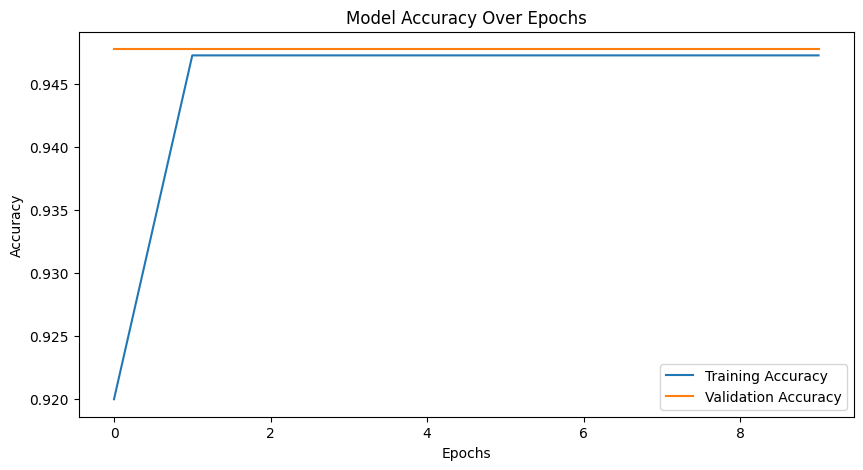

In [ ]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


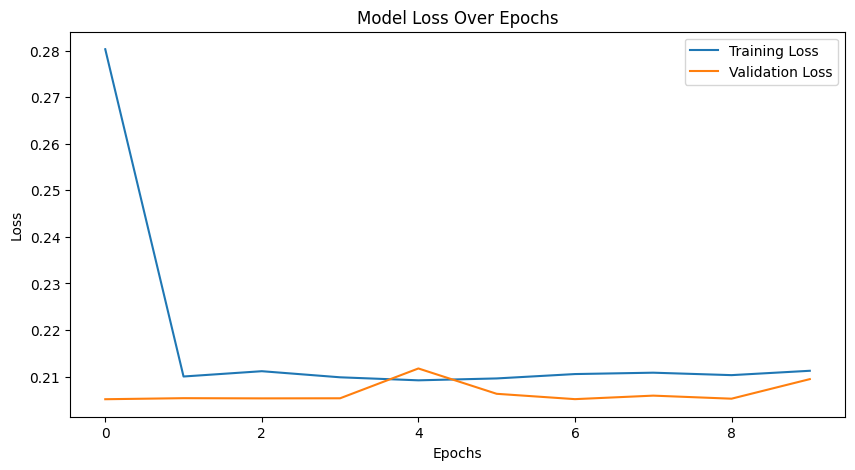

In [ ]:
# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [2]:
def predict_fraud(transaction_data):
    transaction_df = pd.DataFrame([transaction_data])
    transaction_df['Transaction_Amount_Scaled'] = scaler.transform(transaction_df[['Transaction_Amount']])
    transaction_df['Transaction_Type_Label'] = transaction_df['Transaction_Type'].astype('category').cat.codes
    transaction_sequence, _ = create_sequences(transaction_df[features], [0], time_steps)
    prediction = model.predict(transaction_sequence)
    return "Fraud" if prediction[0][0] > 0.5 else "Not Fraud"